<a href="https://colab.research.google.com/github/AdityaVerma2809/NLP/blob/main/word_embedding_from_scratch_usingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [34]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'poor service',
        'poor quality',
        'never go there',
        'needs improvement']

sentiment=np.array([1,1,1,1,1,0,0,0,0,0])

In [3]:
one_hot("amazing restaurant",30)

[1, 5]

In [39]:
vocab_size=30
encoded_reviews=[one_hot(d,vocab_size) for d in reviews]
print(encoded_reviews)

[[12, 25], [1, 5], [21, 12], [16, 23, 4], [15, 26, 9], [16, 25], [26, 4], [26, 25], [25, 26, 6], [17, 2]]


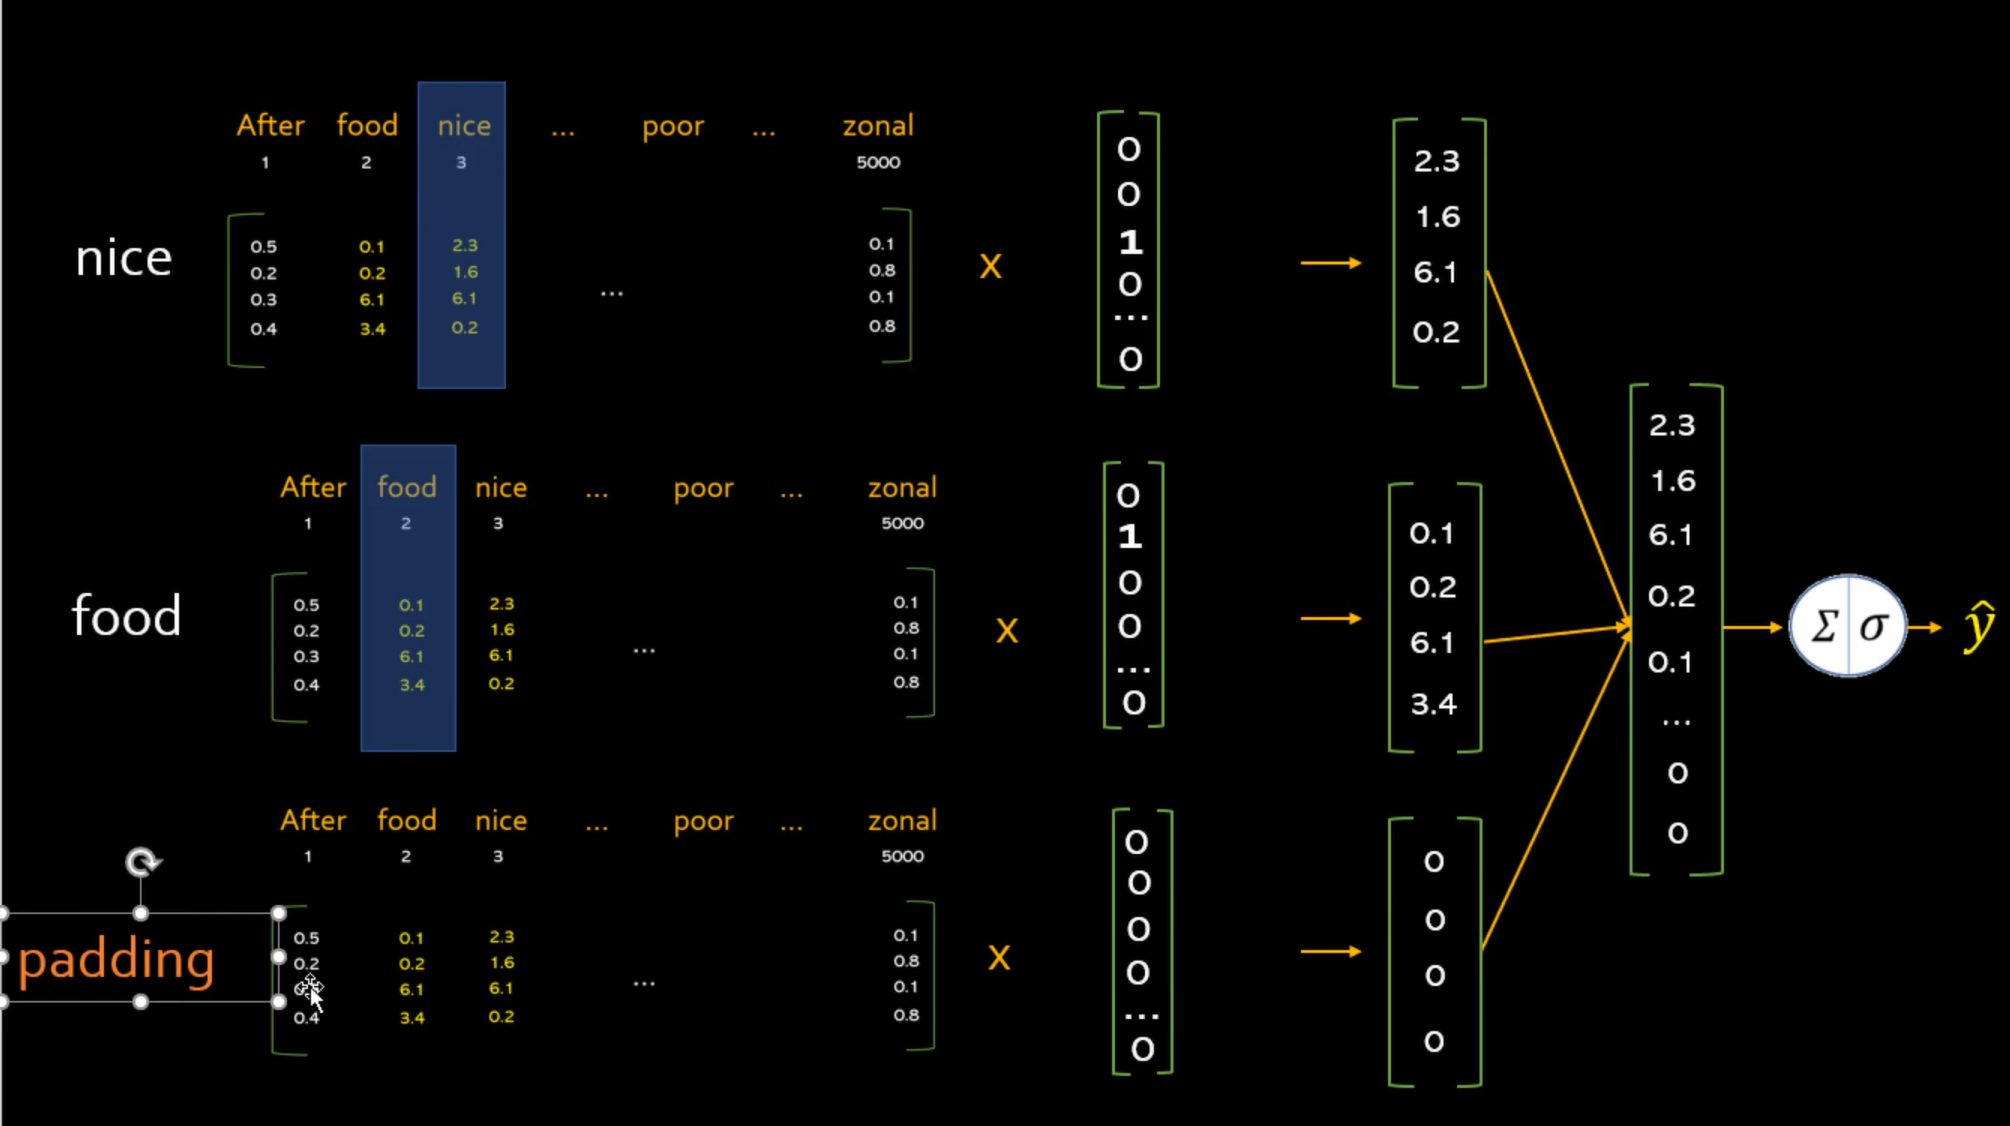

In [40]:
max_length=3
padded_reviews=pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
padded_reviews

array([[12, 25,  0],
       [ 1,  5,  0],
       [21, 12,  0],
       [16, 23,  4],
       [15, 26,  9],
       [16, 25,  0],
       [26,  4,  0],
       [26, 25,  0],
       [25, 26,  6],
       [17,  2,  0]], dtype=int32)

In [41]:
embedded_vector_size=5

model=Sequential()
model.add(Embedding(vocab_size,embedded_vector_size,input_length=max_length,name='embedding'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [42]:
x=padded_reviews
y=sentiment

In [43]:
len(x)

10

In [10]:
x[0]

array([12, 25,  0], dtype=int32)

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(x,y,epochs=30,verbose=0)

In [47]:
loss,accuracy=model.evaluate(x,y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 1.0000 - loss: 0.6598


1.0

In [48]:
weights=model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [49]:
weights[4]

array([-0.01666128,  0.00863786,  0.02651978, -0.00155214, -0.00528366],
      dtype=float32)